# Database II Project
## by Lou GOUBIN, Théo JAOUDET and Clément DELRIEUX
### Link of the GitHub with all the datasets files : https://github.com/tatouti/DatabasePD
### Link of the dataset Erasmus Mobility : https://www.kaggle.com/datasets/donjoeml/erasmus-mobility-statistics-2014-2019/data
### Link of the dataset Global Cost of Living : https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
### Link of the World University Rankings : https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

### Introduction to Erasmus +
The Erasmus program is a student and teacher exchange program, between universities, European schools and educational establishments around the world. Each year, thousands of participants from more than 30 countries go abroad to spend a semeter or more in another country.
### Data description : (Expliquer en une ligne chaque dataset)
1. **Erasmus Mobility** :
This dataset contains the raw data for Erasmus+ mobility for students and staff from 2014 to 2019. We are only working on the data about student during 2019-2020.
2. **Global Cost of Living** : 
This dataset contains information about the cost of living in almost 5000 cities across the world.
3. **World University Ranking** : 
The World University Rankings provide the list of the world’s best universities after juging 13 calibrated performance indicators. We are only working on the ranking of 2019.

### Objectives of this Data Analysis : 
We want first to analyse each dataset individually to get the dynamic of the data, and then we want to mix the datasets informations in order to see what influences the destinations of the students.


## I. Start of the Data Processing

### Import of the libraries 

In [4]:
# Pandas for data processing 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for dataframe display
from IPython.display import display, HTML

# Import unidecode to remove accents
from unidecode import unidecode

# Import library for organization name matching
from fuzzywuzzy import fuzz

### 1. Loading and cleaning of the first dataset  -> Erasmus Mobility Statistics

##### Keeping only the data for the 2019-2020 and exporting a new csv

In [5]:
"""
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
erasmus_df = erasmus_df[erasmus_df['Academic Year']=='2019-2020']
compression_opts = dict(method='zip',
                        archive_name='Erasmus_mobility_statistics_2019_2020.csv')  
erasmus_df.to_csv('Erasmus_mobility_statistics_2019_2020.zip', index=False,
          compression=compression_opts) 
"""

"\nzf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') \nerasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))\nerasmus_df = erasmus_df[erasmus_df['Academic Year']=='2019-2020']\ncompression_opts = dict(method='zip',\n                        archive_name='Erasmus_mobility_statistics_2019_2020.csv')  \nerasmus_df.to_csv('Erasmus_mobility_statistics_2019_2020.zip', index=False,\n          compression=compression_opts) \n"

##### Using the new data created

In [6]:
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2019_2020.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2019_2020.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

print(erasmus_df.info(verbose=False))

/tmp/ipykernel_18751/1018525000.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2019_2020.csv'))


<class 'pandas.core.frame.DataFrame'>
Index: 736353 entries, 0 to 736433
Columns: 21 entries, Academic Year to Participants
dtypes: float64(2), object(19)
memory usage: 123.6+ MB
None


In [7]:
erasmus_df

,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1.0
1,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,No,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1.0
2,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1.0
3,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1.0
4,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736430,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736431,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736432,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


#### Cleaning and dropping more columns

In [8]:
def drop_ages(x):
    if x == '-':
        return np.nan
    if int(x) > 70 or int(x) < 10:
        return np.nan
    else:
        return x
    
def getCountry(x):
    country = pycountry.countries.get(alpha_2=x)
    if country != None:
        return country.name
    else:
        return x

def toBool(x):
    if x == 'Yes':
        return 'true'
    else:
        return 'false'
    
def isStudent(x):
    if x == 'Staff':
        return 'false'
    else:
        return 'true'

def clean_name (name) :
    cleaned_name = unidecode(re.sub('[^a-zA-Z0-9 ]', '', name))
    cleaned_name = re.sub('\s+', '_', cleaned_name) 
    return cleaned_name

In [9]:
#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

#Remove columns if present
erasmus_df = erasmus_df.drop(columns = ['Activity (mob)','GroupLeader', 'Education Level', 'Participants','Academic Year', 'Mobility Start Month', 'Mobility End Month' ])

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Sending City'] = erasmus_df['Sending City'].str.capitalize().map(clean_name)
erasmus_df['Receiving City'] = erasmus_df['Receiving City'].str.capitalize().map(clean_name)
erasmus_df['Sending Organization'] = erasmus_df['Sending Organization'].str.title().map(clean_name)
erasmus_df['Receiving Organization'] = erasmus_df['Receiving Organization'].str.title().map(clean_name)
erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")
erasmus_df['Participant Profile'] = erasmus_df['Participant Profile'].map(isStudent)

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Special Needs'] = erasmus_df['Special Needs'].map(toBool)
erasmus_df['Fewer Opportunities'] = erasmus_df['Fewer Opportunities'].map(toBool)

# Country name changes
erasmus_df['Sending Country Code'] = erasmus_df['Sending Country Code'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df['Receiving Country Code'] = erasmus_df['Receiving Country Code'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df['Participant Nationality'] = erasmus_df['Participant Nationality'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df = erasmus_df.rename(columns={'Sending Country Code':'Sending Country',
                                        'Receiving Country Code':'Receiving Country',
                                        'Participant Profile':'isStudent'})

citiesInSet = set(erasmus_df['Sending City'].unique()) | set(erasmus_df['Receiving City'].unique())
citiesInSet = list(citiesInSet)

countriesInSet = set(erasmus_df['Sending Country'].unique()) | set(erasmus_df['Receiving Country'].unique())
countriesInSet = list(countriesInSet)

erasmus_df

,Mobility Duration,Field of Education,Participant Nationality,Participant Gender,isStudent,Special Needs,Fewer Opportunities,Participant Age,Sending Country,Sending City,Sending Organization,Receiving Country,Receiving City,Receiving Organization
0,33,Other,Estonia,Female,true,false,false,18,Estonia,Tallinn,Mt_Noortevahetuse_Arengu_hing_Estyes,Russian_Federation,Nizhny_novgorod,Interregional_Youth_Social_Movement_Of_Support...
1,56,Other,Italy,Male,true,false,true,29,Italy,Trappeto,Cesie,United_Kingdom,Cardiff,Language_Academy_Wales
2,6,Languages,Austria,Female,false,false,false,39,Austria,Hollabrunn,Htl_Fr_LebensmitteltechnologieLebensmittelsich...,EL,Heraklion,Institut_Fr_Europische_Lehrerfortbildung_Ug_Ha...
3,15,Teacher training with subject specialization,Austria,Female,false,false,false,27,Austria,Weiz,BhakBhas_Weiz,Ireland,Dublin,Atlantic_Language_Dublin
4,5,Education,Austria,Female,false,false,false,26,Austria,Linz,Bundesbildungsanstalt_Fr_Elementarpdagogik,Malta,Stjulians,Executive_Training_Institute_Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,7,Other,Turkey,Female,false,false,true,24,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736430,7,Other,United_Kingdom,Female,false,false,true,32,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736431,7,Other,United_Kingdom,Female,false,false,true,37,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736432,7,Other,United_Kingdom,Male,false,false,false,41,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd


In [10]:
print("There are  {}  exchange students and staff in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  644606  exchange students and staff in our Dataset
There are 14 features (columns) in our dataset


### 2. Loading and cleaning of the second dataset  -> Cost of living

In [11]:
zf = zipfile.ZipFile('CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

# Keep only usefull columns
listToKeep = ['city','country','x1','x3','x10','x13','x4','x25','x24','x6',
              'x11','x20','x23','x27','x28','x29',
              'x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]

# Rename all the columns
nameColumns = ['City','Country','Meal','McDo','Bread','Cheese','Bar Beer','Market Beer','Market Wine','Cappucino',
               'Rice','Potatoes','Water','Cigarettes','One Ticket','Monthly Pass',
               'Basics','Mobile','Internet','Cinema','Jeans','Apartment','Net Salary']
cof = cof.set_axis(nameColumns, axis=1)

# Drop the cities with no rent
cof = cof[cof['Apartment'].isna()==False]

# Drop not used columns
cof = cof.drop(columns=['Meal','Bread','Cheese','Market Beer','Market Wine','Rice','Potatoes','Water',
                        'Cigarettes','One Ticket','Monthly Pass','Mobile','Internet','Cinema','Jeans'])

# Keep only the cities present in the erasmus dataset by using clean_name function
cof['City'] = cof['City'].map(clean_name)
cof = cof[cof['City'].isin(citiesInSet)]

cof

,City,Country,McDo,Bar Beer,Cappucino,Basics,Apartment,Net Salary
0,Seoul,South Korea,6.15,3.07,3.93,182.13,742.54,2689.62
1,Shanghai,China,5.69,1.14,3.98,66.00,1091.93,1419.87
2,Guangzhou,China,4.98,0.85,3.54,59.65,533.28,1211.68
3,Mumbai,India,3.68,2.46,2.48,43.57,522.40,640.81
5,Dhaka,Bangladesh,4.88,5.85,1.95,37.06,142.09,280.73
...,...,...,...,...,...,...,...,...
4856,Bernolakovo,Slovakia,6.32,2.11,2.11,210.75,632.25,843.00
4878,Castlegar,Canada,9.26,4.45,3.15,164.23,1278.48,3186.94
4912,Manavgat,Turkey,3.76,2.15,2.33,58.86,259.38,375.66
4921,Richmond,Australia,NaN,NaN,NaN,84.02,2242.61,NaN


### 3. Loading and cleaning of the third dataset  -> University rankings

In [12]:
def calculateGenderGap(x):
    gap=0
    x = str(x)
    if(x!='nan'):
        x = x.split(' : ')
        gap = int(x[0])-int(x[1])
    return gap
# Negative result means there are more male
# Positive result means there are more female

In [13]:
zf = zipfile.ZipFile('UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

# Drop some columns
rank2019 = rank2019.loc[:, ~rank2019.columns.str.endswith('_rank')]
rank2019 = rank2019.drop(columns=['aliases','subjects_offered','closed','unaccredited', 'rank_order', 'rank'])
rank2019['genderGap'] = rank2019['stats_female_male_ratio'].map(calculateGenderGap)

# Add a column (id + 1)
rank2019.insert(0, 'rank', range(1, 1 + len(rank2019)))

rank2019['name'] = rank2019['name'].map(clean_name)
rank2019['location'] = rank2019['location'].map(clean_name)

#Only keep the universities in countries present in the erasmus dataset
rank2019 = rank2019[rank2019['location'].isin(countriesInSet)]

rank2019

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
0,1,University_of_Oxford,96.0,91.8,99.5,99.1,67.0,96.3,United_Kingdom,"20,300",11.0,40%,46 : 54,-8
1,2,University_of_Cambridge,94.8,92.1,98.8,97.1,52.9,94.3,United_Kingdom,"18,750",10.9,37%,46 : 54,-8
2,3,Stanford_University,94.7,93.6,96.8,99.9,64.6,79.3,United_States,"15,878",7.4,23%,43 : 57,-14
3,4,Massachusetts_Institute_of_Technology,94.2,91.9,92.7,99.9,87.6,89.0,United_States,"11,231",8.7,34%,38 : 62,-24
4,5,California_Institute_of_Technology,94.1,94.5,97.2,99.2,88.2,62.3,United_States,"2,255",6.5,29%,33 : 67,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,Yamaguchi_University,9.8–18.9,21.1,10.0,11.5,43.0,23.5,Japan,"10,569",10.8,4%,36 : 64,-28
1251,1252,Yanshan_University,9.8–18.9,15.5,10.9,9.1,52.5,15.0,China,"32,183",16.3,1%,39 : 61,-22
1252,1253,Yarmouk_University,9.8–18.9,20.0,8.1,6.9,35.4,49.4,Jordan,"35,320",34.5,9%,61 : 39,22
1254,1255,Yeditepe_University,9.8–18.9,14.6,9.8,10.1,49.7,22.1,Turkey,"19,705",18.6,2%,55 : 45,10


## II. Data Analysis

### 1. Erasmus Mobility analysis

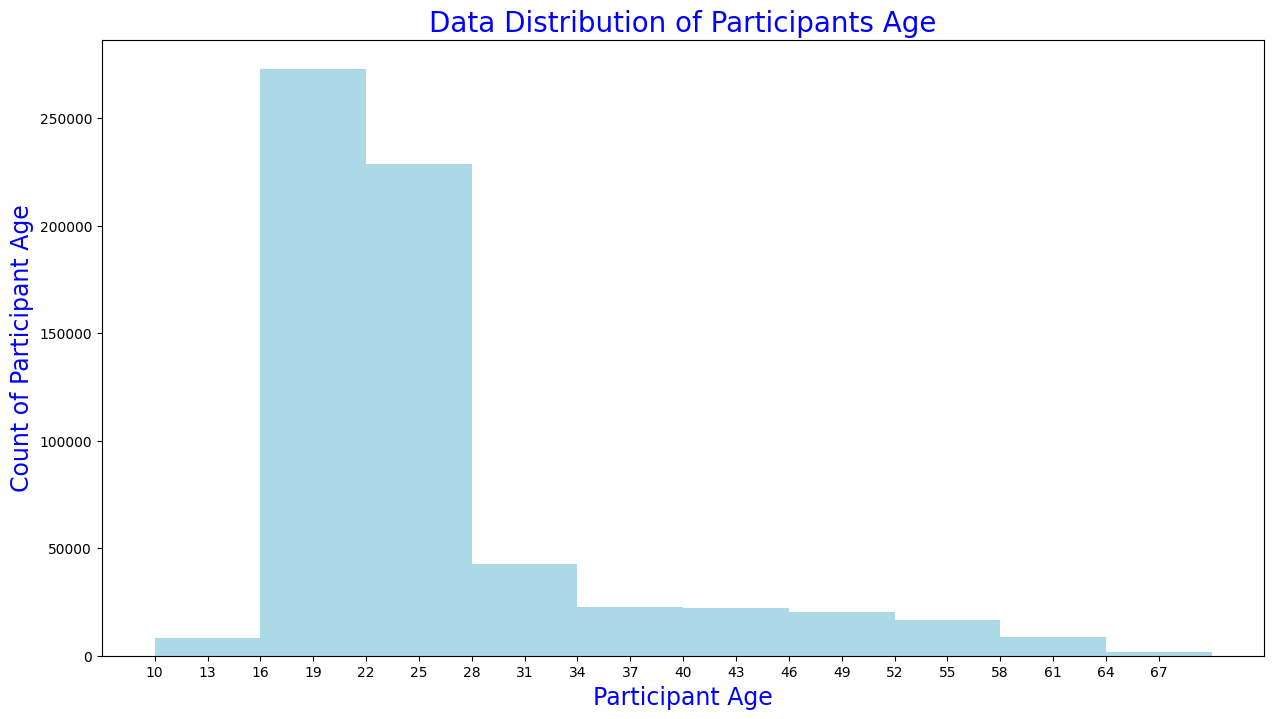

In [98]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="lightblue")

axs.set_title("Data Distribution of Participants Age", color="blue",fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="blue", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="blue", fontsize=17)

plt.show()

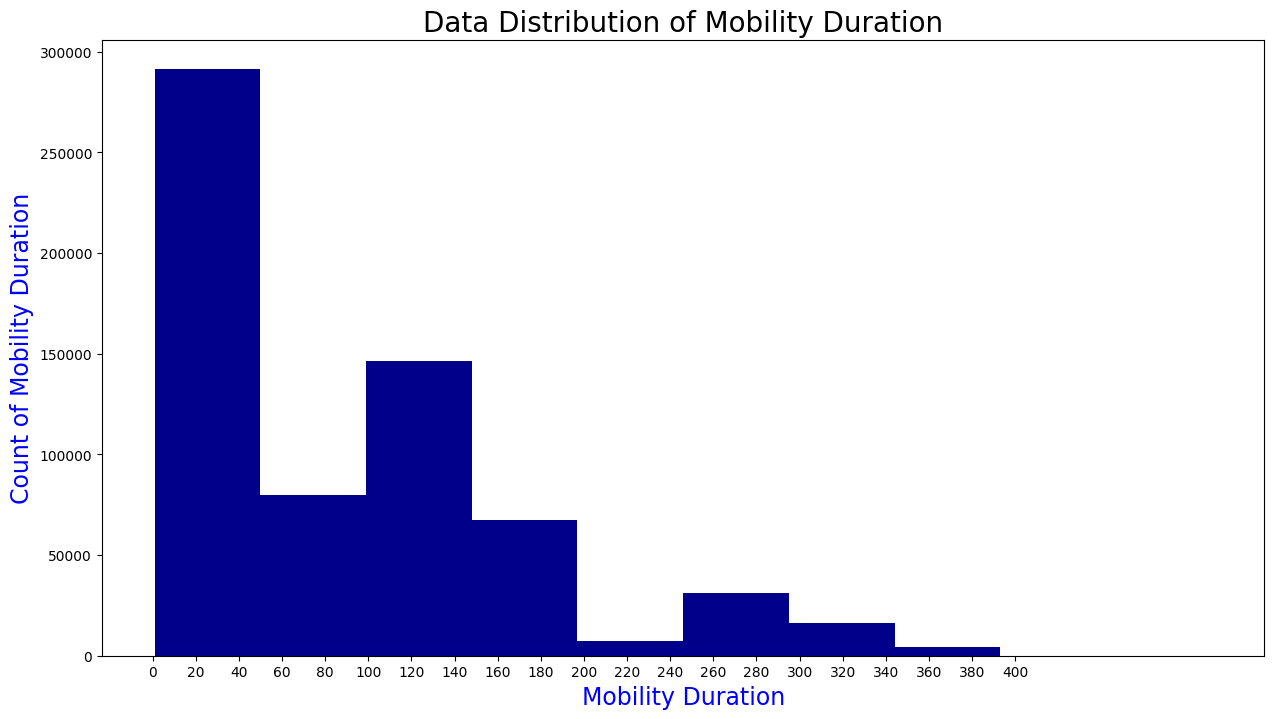

In [99]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="darkblue")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,20)])
axs.set_xlabel("Mobility Duration", color="blue", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="blue", fontsize=17)

plt.show()

In [100]:
display(erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        erasmus_df.groupby('Sending Country').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        erasmus_df.groupby('Receiving Country').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame())


KeyError: 'Academic Year'

In [ ]:
receivingCity = erasmus_df.groupby(['Receiving City','Receiving Country']).count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()
display(erasmus_df.groupby(['Sending City','Sending Country']).count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        receivingCity)

,,Participants
Sending City,Sending Country,
Paris,France,7271
Madrid,Spain,6403
Berlin,Germany,5372
Roma,Italy,4946
Milano,Italy,4475


,,Participants
Receiving City,Receiving Country,
Barcelona,Spain,9057
Madrid,Spain,8182
London,United Kingdom,7996
Berlin,Germany,7685
Valencia,Spain,7140


In [ ]:
receivingUni = erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants
display(receivingUni.to_frame(),
        erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame())

,Participants
Receiving Organization,
Universitat De Valencia,2352
Alma Mater Studiorum - Universita Di Bologna,2313
Universidade De Lisboa,2141
Universidad De Granada,1873
Universidad Complutense De Madrid,1615


,Participants
Sending Organization,
Alma Mater Studiorum - Universita Di Bologna,3029
Universidad De Granada,2120
Universita Degli Studi Di Padova,2011
Universita Degli Studi Di Roma La Sapienza,1812
Universidad Complutense De Madrid,1683


In [ ]:
sending = erasmus_df['Sending Country'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving,left_on='Sending Country',right_on='Receiving Country')
sending_receiving['Total Amount'] = sending_receiving['count_x']+sending_receiving['count_y']

sending_receiving = sending_receiving.drop('Receiving Country',axis=1)

sending_receiving = sending_receiving.rename(columns = {"Sending Country":"Country",
                                                        "count_x":"Sending Amount",
                                                        "count_y":"Receiving Amount"}).sort_values(by='Total Amount',ascending=False)

# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount,Total Amount
Country,,,
Spain,57813,78309,136122
Germany,63175,48865,112040
France,72688,37761,110449
Italy,56196,48784,104980
United Kingdom,23627,40711,64338
Poland,25810,28834,54644
Netherlands,21083,19020,40103
Turkey,27605,12313,39918
Portugal,14939,24511,39450


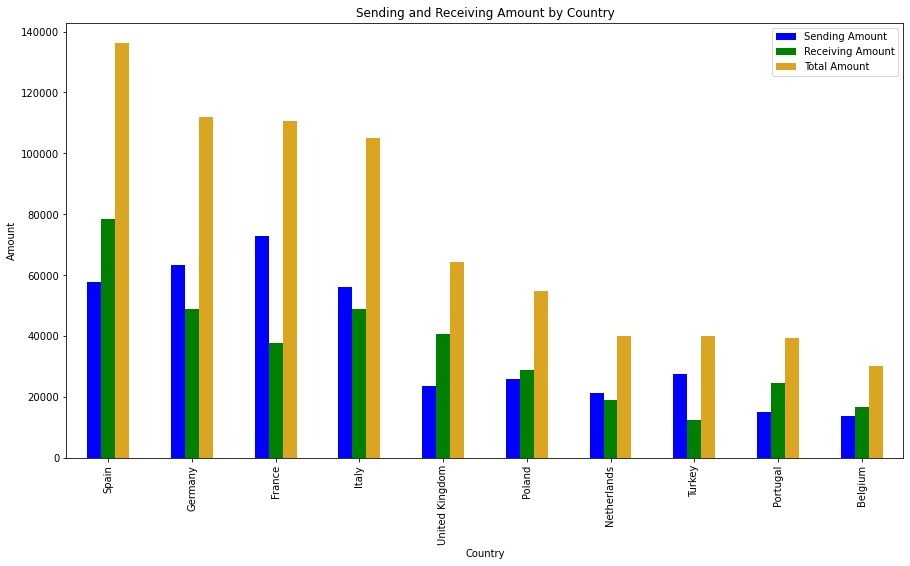

In [ ]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0,color=['Blue','Green','goldenrod'])
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Special Needs %')

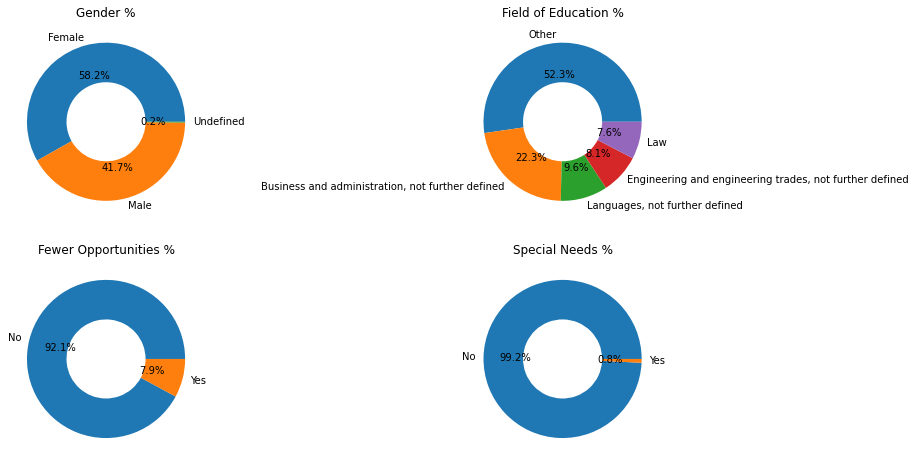

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')

### 2. Cost of living analysis

In [ ]:
cof.sort_values(by='Net Salary',ascending=False).head(10)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
4459,Bainbridge Island,United States,25.00,9.65,2.64,11.70,5.00,3.16,12.50,5.28,2.14,2.44,2.33,8.80,2.00,50.00,225.00,0.11,68.00,15.75,47.20,1500.00,9000.00
3049,Annapolis,United States,20.00,8.00,3.30,10.04,5.00,2.50,15.00,4.39,4.48,3.03,1.75,9.50,3.29,85.00,201.83,0.10,64.12,12.00,41.00,2375.00,8888.00
3633,Newport Beach,United States,20.00,8.00,2.54,10.83,9.00,3.57,16.00,4.18,2.10,3.17,2.25,8.00,1.50,95.00,90.00,0.22,51.00,12.00,48.00,3500.00,8466.00
3154,East Palo Alto,United States,17.50,8.00,4.67,13.23,7.00,1.21,13.00,4.47,4.20,3.74,2.25,9.25,2.50,90.00,172.50,0.16,55.15,13.00,55.44,2333.33,8346.00
3873,Des Plaines,United States,20.00,9.00,2.20,8.82,5.00,1.43,13.00,4.25,3.73,1.10,1.00,14.00,2.25,75.00,163.78,0.33,30.00,15.00,37.50,1550.00,8333.33
3433,Triesen,Liechtenstein,25.75,14.96,3.64,14.76,5.34,2.07,16.03,5.16,2.14,2.02,1.02,9.62,4.50,68.49,194.84,0.17,54.13,19.23,92.33,910.32,8061.99
3109,Foster City,United States,17.50,7.50,5.51,17.64,NaN,NaN,15.00,4.95,11.02,NaN,1.50,NaN,NaN,NaN,115.00,NaN,30.00,NaN,55.00,2600.00,8000.00
3128,Zug,Switzerland,32.05,16.03,3.36,24.25,6.68,2.01,13.09,5.58,3.16,3.15,1.03,9.08,3.63,84.41,208.50,0.20,57.67,19.23,90.82,2154.71,7935.38
2057,Bellevue,United States,30.00,9.00,3.70,14.59,6.00,2.14,16.50,5.11,5.51,2.69,1.36,9.59,2.90,90.00,201.54,0.25,65.62,12.00,48.87,2500.00,7833.33
2479,Highlands Ranch,United States,15.50,8.50,3.47,13.23,7.00,1.43,14.00,5.67,3.14,4.07,2.00,7.50,NaN,NaN,115.00,NaN,50.00,12.00,55.00,2200.00,7700.00


In [ ]:
# Get only the lines with apartment and salary not null
cofRatio = cof[cof['Net Salary'].isna()==False]
cofRatio['Ratio Apart/Sal'] = cofRatio['Apartment']/cofRatio['Net Salary']*100

# Take out corrupted values
cofRatio = cofRatio[(cofRatio['Ratio Apart/Sal']<100) & (cofRatio['Ratio Apart/Sal']>10)]

cofRatio.sort_values(by='Ratio Apart/Sal',ascending=True)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Apart/Sal
1005,Uijeongbu,South Korea,5.38,5.76,2.85,11.54,2.30,1.92,15.36,3.46,1.92,3.84,0.90,3.46,NaN,NaN,135.98,0.16,18.44,7.68,58.26,230.47,2304.69,10.000043
2396,Jendouba,Tunisia,0.62,1.55,0.08,5.42,0.62,0.43,2.32,0.67,0.25,0.46,0.15,1.24,0.05,2.48,23.70,0.03,18.59,3.41,13.94,46.47,463.25,10.031301
1121,Wuppertal,Germany,13.70,8.43,1.58,10.75,3.69,0.63,4.16,3.64,2.28,1.32,0.35,8.06,3.06,74.82,201.77,0.12,35.56,10.01,75.08,368.81,3628.40,10.164535
3220,Jekabpils,Latvia,7.90,5.27,1.03,7.90,2.11,1.05,5.27,2.11,0.95,0.53,0.63,4.16,1.05,22.49,149.28,0.00,18.97,7.06,43.20,105.37,1001.06,10.525843
4677,Udayagiri,India,2.46,4.30,0.47,4.61,1.84,2.05,8.60,2.01,0.66,0.45,0.36,3.87,0.61,NaN,24.64,0.01,9.29,2.70,35.31,67.55,614.09,11.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Cairo,Egypt,4.07,4.07,0.52,3.28,1.63,1.29,8.14,1.75,0.73,0.34,0.22,2.03,0.28,13.23,26.53,0.01,16.37,4.48,39.37,196.83,200.40,98.218563
529,Monaco,Monaco,26.34,9.48,3.95,14.75,7.38,2.11,13.70,4.54,3.34,1.58,2.03,10.54,2.11,37.93,184.18,NaN,57.60,10.54,83.60,5490.31,5589.37,98.227707
620,Malang,Indonesia,1.30,3.11,0.97,6.15,2.48,1.94,10.21,0.89,0.75,0.71,0.36,1.94,0.32,3.89,43.75,0.10,23.77,2.27,31.76,205.26,207.42,98.958635
4097,Pontes e Lacerda,Brazil,NaN,NaN,NaN,2.30,NaN,1.92,5.75,NaN,2.11,2.87,0.57,2.87,NaN,NaN,133.24,NaN,18.97,NaN,17.22,229.91,232.21,99.009517


In [ ]:
# Per country
cofCountry = cof.drop('City',axis=1).groupby('Country').mean()
cofCountry.sort_values(by='McDo',ascending=True).head(10)

,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,0.800000,2.090000,1.030000,NaN,1.120000,0.920000,5.620000,1.610000,0.850000,1.690000,0.790000,1.610000,0.320000,14.460000,96.390000,0.270000,35.820000,2.010000,12.850000,401.610000,426.370000
Guinea-Bissau,2.620000,2.210000,0.240000,NaN,1.010000,0.880000,5.620000,2.410000,0.800000,0.760000,0.800000,1.610000,NaN,NaN,16.060000,0.180000,NaN,1.610000,88.350000,346.160000,1008.780000
Swaziland,3.115000,2.340000,0.590000,7.430000,0.975000,0.830000,4.510000,1.175000,1.280000,0.800000,0.630000,2.090000,1.140000,29.940000,92.190000,0.130000,54.355000,3.140000,54.320000,278.480000,532.250000
Cameroon,2.543333,2.610000,0.613333,17.093333,1.093333,1.015000,4.820000,1.050000,1.003333,1.285000,0.596667,1.631667,1.598000,8.035000,74.806667,0.128333,41.030000,6.423333,23.301667,104.521667,229.777500
Eritrea,11.400000,2.670000,0.500000,NaN,1.000000,1.000000,NaN,1.060000,1.870000,1.560000,1.580000,2.500000,0.220000,NaN,30.000000,0.100000,NaN,1.000000,30.000000,650.000000,1060.000000
Algeria,2.022857,2.763704,0.189259,5.213077,1.431250,1.390435,7.146522,0.511111,0.988966,0.514643,0.270690,2.121786,0.212308,8.880667,40.312692,0.064483,33.906667,4.454167,29.257778,145.281034,259.595769
Philippines,2.978246,2.777018,1.172037,5.895370,1.252778,1.105769,6.443333,2.174727,0.887018,1.567407,0.681250,2.553750,0.299767,12.210357,97.866429,0.142143,36.231228,4.742182,36.545714,263.838421,291.160638
Tunisia,1.750526,2.865789,0.109474,6.971176,1.056667,0.822353,3.951765,0.596316,0.693158,0.438947,0.231053,2.414444,0.225263,9.194118,33.038421,0.058889,18.660526,3.651111,27.816316,126.891053,287.027895
Uzbekistan,3.454286,2.920000,0.340000,3.950000,0.902857,0.896667,2.440000,1.360000,1.090000,0.490000,0.294286,1.960000,0.191429,11.421667,45.048333,0.018333,15.844286,2.570000,25.566667,222.907143,242.041429


### 3. University Ranking analysis

In [ ]:
tempUni = list(receivingUni.index)
print("Top 5 receiving univerisities",tempUni)

tempUniFinal=[]
for u in tempUni: # Only get the city of the uni (taking the last word)
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print("Citites of thoses 5 univerisities",tempUniFinal)

rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal))]

Top 5 receiving univerisities ['Universitat De Valencia', 'Alma Mater Studiorum - Universita Di Bologna', 'Universidade De Lisboa', 'Universidad De Granada', 'Universidad Complutense De Madrid']
Citites of thoses 5 univerisities ['Valencia', 'Bologna', 'Lisboa', 'Granada', 'Madrid']


,rank_order,rank,rank_range,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
179,1800,180,1-200,University of Bologna,54.7,51.2,32.6,82.7,43.9,49.2,Italy,"66,998",23.9,11%,57 : 43,14
355,3560,351–400,351–400,Autonomous University of Madrid,41.7–43.9,33.9,28.4,64.8,37.8,51.1,Spain,"29,532",13.4,14%,59 : 41,18
417,4180,401–500,401–500,Complutense University of Madrid,37.1–41.6,42.4,28.4,42.7,35.6,44.3,Spain,"64,466",20.1,14%,61 : 39,22
496,4970,401–500,401–500,University of Valencia,37.1–41.6,28.0,19.6,68.0,36.3,44.9,Spain,"50,927",16.7,11%,62 : 38,24
624,6250,601–800,601–800,Carlos III University of Madrid,26.0–33.4,26.4,16.0,37.3,37.8,58.6,Spain,"16,917",11.0,15%,43 : 57,-14
660,6610,601–800,601–800,University of Granada,26.0–33.4,23.5,19.0,48.3,35.0,47.0,Spain,"52,989",14.9,10%,57 : 43,14
740,7410,601–800,601–800,Polytechnic University of Valencia,26.0–33.4,25.4,12.0,45.2,44.5,47.5,Spain,"21,945",9.4,13%,38 : 62,-24
775,7760,601–800,601–800,Technical University of Madrid,26.0–33.4,31.1,13.9,37.9,42.6,47.5,Spain,"39,269",13.2,13%,32 : 68,-36


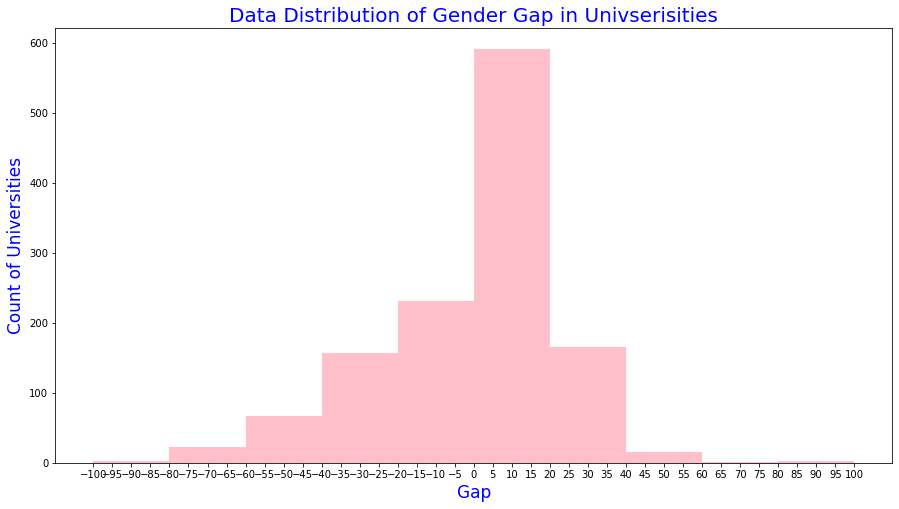

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])

axs.hist(rank2019['genderGap'],color="pink")

axs.set_title("Data Distribution of Gender Gap in Univserisities", color="blue",fontsize=20)
axs.set_xticks([i for i in range(-100,105,5)])
axs.set_xlabel("Gap", color="blue", fontsize=17)
axs.set_ylabel("Count of Universities", color="blue", fontsize=17)

plt.show()

<AxesSubplot:xlabel='Rank Range', ylabel='Gap Value'>

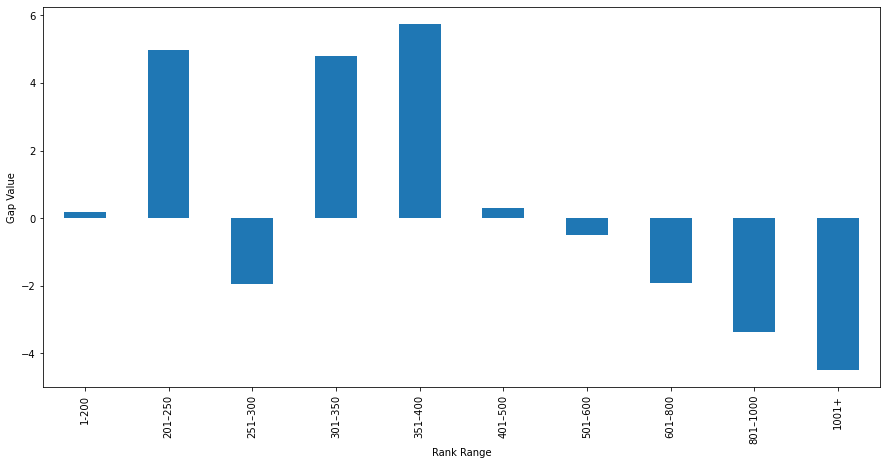

In [ ]:
rank2019Range = rank2019[['rank_range','genderGap']].groupby('rank_range').mean()
rank2019Range.loc[len(rank2019Range)] = rank2019Range.loc['1001+']
rank2019Range=rank2019Range.drop('1001+')
rank2019Range = rank2019Range.rename(index={10:'1001+'})

rank2019Range['genderGap'].plot(kind='bar',xlabel='Rank Range',ylabel='Gap Value',figsize=(15,7))

<AxesSubplot:title={'center':'Most Countries with universities in the top 10'}, xlabel='location'>

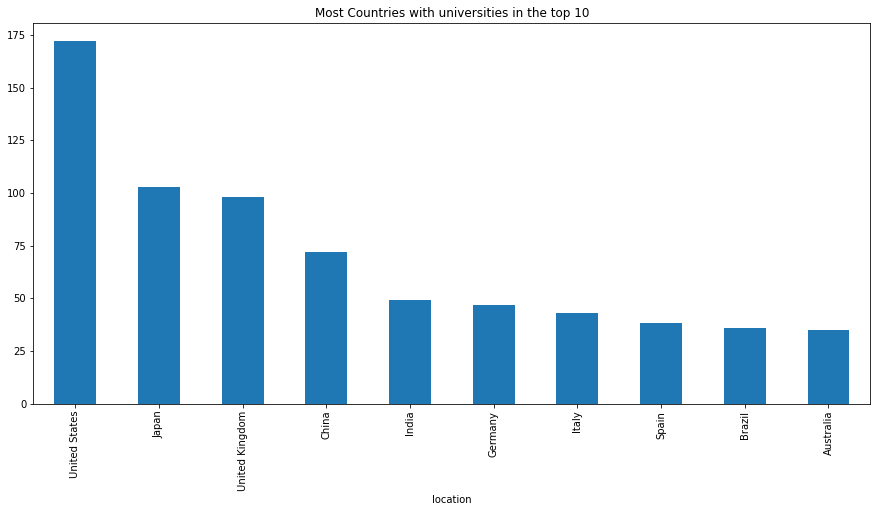

In [ ]:
a=rank2019.groupby('location').count().sort_values(by='rank_order',ascending=False).head(10)
a['rank'].plot(kind='bar',figsize=(15,7),title='Most Countries with universities in the top 10')

## III. Cross data analysis

In [ ]:
tempCity,tempCountry=[],[]
for i in range(len(receivingCity.index)):
    tempCity.append(receivingCity.index[i][0])
    tempCountry.append(receivingCity.index[i][1])
    
cofRatio[(cofRatio['City'].isin(tempCity)) & (cofRatio['Country'].isin(tempCountry))]

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Apart/Sal
28,London,United Kingdom,18.45,8.61,1.25,7.92,7.26,2.38,11.07,4.14,2.15,1.41,1.38,15.99,3.20,184.50,299.36,0.13,35.92,14.76,89.10,2417.07,4033.84,59.919828
80,Madrid,Spain,12.64,8.43,1.09,10.67,3.69,1.03,5.27,2.23,1.22,1.21,0.72,5.27,1.58,57.48,166.08,0.18,38.10,9.48,77.06,1056.14,2089.54,50.544139
120,Barcelona,Spain,14.75,9.48,1.50,12.32,3.16,1.16,6.32,2.35,1.35,1.40,0.81,5.27,2.53,42.15,170.85,0.23,40.15,9.48,77.21,1083.72,1978.23,54.782305
144,Berlin,Germany,12.64,9.48,1.70,12.69,4.21,1.13,5.90,3.37,2.43,2.00,0.69,8.43,3.16,89.57,308.30,0.11,40.24,12.64,88.38,1321.90,3158.05,41.858109
646,Valencia,Spain,12.64,8.43,1.07,13.18,3.16,1.01,5.27,2.12,1.19,1.66,0.63,5.43,1.58,31.61,141.51,0.14,34.19,7.90,68.49,808.48,1557.61,51.905162


<AxesSubplot:title={'center':'Where the French go the most'}, xlabel='Receiving Country'>

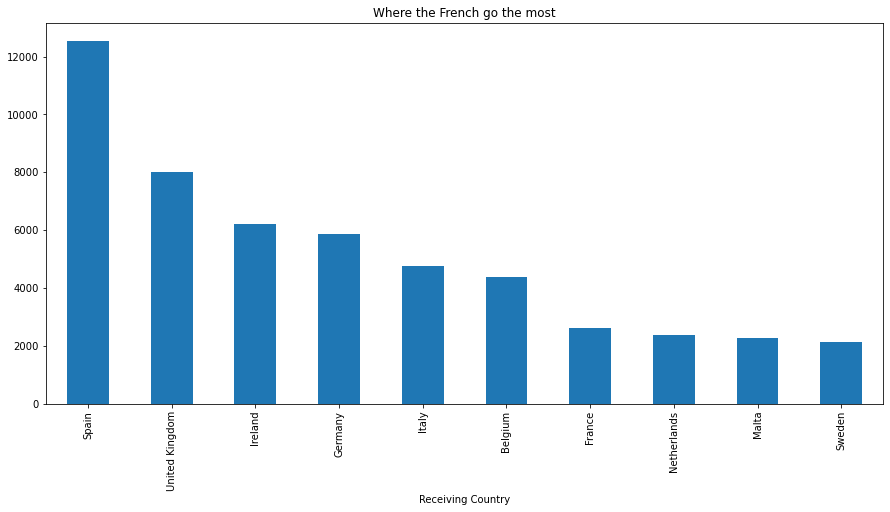

In [ ]:
erasmusFR=erasmus_df[erasmus_df['Participant Nationality']=='France'].groupby('Receiving Country').count().sort_values(by='Academic Year',ascending=False).head(10).Participants
erasmusFR.plot(kind='bar',title="Where the French go the most",figsize=(15,7))

In [ ]:
cofFr = cof.drop('City',axis=1)
display(cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Market Wine',ascending=True).head(),
        cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Cheese',ascending=True).Cheese.head().to_frame())

,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,,
Spain,11.488784,7.869863,1.047222,10.803889,2.514595,0.965634,5.070000,1.742703,1.276269,1.306667,0.669178,5.425070,1.552464,38.126491,125.976164,0.182727,37.077027,8.173472,73.400270,652.215946,1656.963521
Germany,11.897748,8.813514,1.825351,12.378137,3.879083,0.687248,5.457768,3.096330,2.036667,1.596696,0.584862,7.680893,2.934679,72.052718,255.090265,0.122500,36.383243,11.860619,77.400351,712.719052,2642.044059
Italy,15.060000,8.529748,1.675508,13.424696,4.525583,1.515897,5.710847,1.540417,2.006983,1.388000,0.477881,5.991441,1.561404,37.059813,187.396154,0.178200,29.259237,9.004958,76.915913,582.026750,1519.632155
Netherlands,17.130750,9.496667,1.895641,11.339250,5.190541,1.237436,6.120513,3.128500,2.036154,1.112632,0.772564,8.556923,3.737714,115.093235,228.984595,0.163947,44.220000,11.867692,85.038000,1116.863750,3177.985556
Belgium,17.314483,9.743793,1.903214,13.170357,4.045172,1.565200,6.482500,2.946897,2.099643,1.550385,0.799259,7.697500,2.648333,45.337143,174.525556,0.221481,51.006071,10.950714,92.957857,777.174138,2384.043333


,Cheese
Country,
United Kingdom,7.282705
Ireland,8.406000
Sweden,8.938462
Malta,9.950526
Spain,10.803889


In [ ]:
import awoc
# Initialize the AWOC class.
my_world = awoc.AWOC()

# Let's retrieve the full list of nations of Europe.
countries_of_europe = my_world.get_countries_list_of('Europe')

# Show unies only in Europe
rankEU=rank2019[rank2019['location'].isin(countries_of_europe)]
rankEU.head(10)

,rank_order,rank,rank_range,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
0,10,1,1-200,University of Oxford,96.0,91.8,99.5,99.1,67.0,96.3,United Kingdom,"20,300",11.0,40%,46 : 54,-8
1,20,2,1-200,University of Cambridge,94.8,92.1,98.8,97.1,52.9,94.3,United Kingdom,"18,750",10.9,37%,46 : 54,-8
8,90,9,1-200,Imperial College London,90.3,85.8,87.7,97.8,67.3,97.1,United Kingdom,"16,425",11.6,56%,38 : 62,-24
10,110,11,1-200,ETH Zurich,89.3,83.3,91.4,93.8,56.1,98.2,Switzerland,"18,171",12.3,39%,31 : 69,-38
13,140,14,1-200,UCL,87.8,79.1,90.1,95.9,42.4,95.8,United Kingdom,"31,695",10.6,51%,57 : 43,14
25,260,26,1-200,London School of Economics and Political Science,81.3,71.0,83.1,91.0,34.8,92.5,United Kingdom,"10,030",11.8,70%,52 : 48,4
28,290,29,1-200,University of Edinburgh,79.8,69.2,73.7,96.8,38.2,93.3,United Kingdom,"28,155",12.7,41%,60 : 40,20
31,320,=32,1-200,LMU Munich,78.3,69.9,76.1,90.2,100.0,65.6,Germany,"35,389",36.0,16%,61 : 39,22
34,350,35,1-200,École Polytechnique Fédérale de Lausanne,76.9,66.5,66.5,92.8,69.1,98.7,Switzerland,"10,343",11.4,57%,28 : 72,-44
37,380,38,1-200,King’s College London,75.8,61.1,68.7,95.2,45.9,95.3,United Kingdom,"24,295",12.1,42%,62 : 38,24


<AxesSubplot:title={'center':'10 countries with the most universities'}, xlabel='location'>

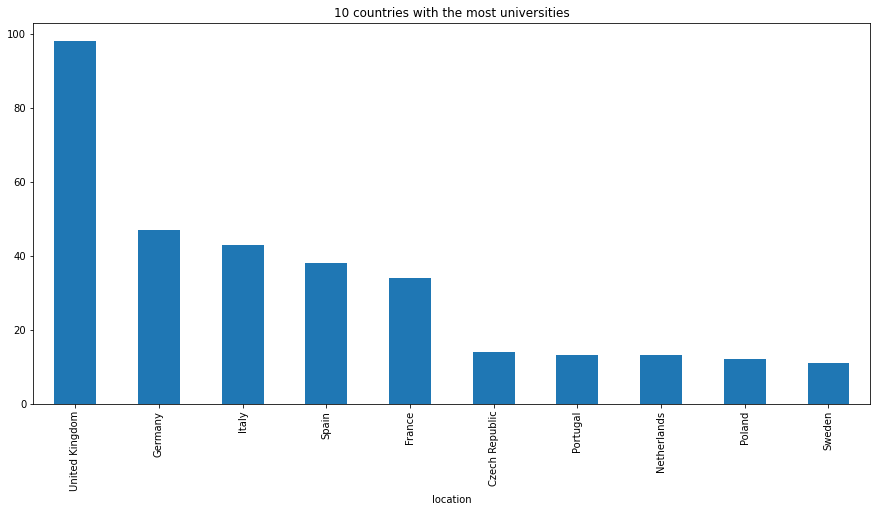

In [ ]:
a=rankEU.groupby('location').count().sort_values(by='rank_order',ascending=False).head(10)
a['rank'].plot(kind='bar',figsize=(15,7),title='10 countries with the most universities')

## IV. RDF Transformation

In [30]:
import pandas as pd
import rdfpandas

# Load the required libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace, RDFS
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD, OWL

import re

# Initialize RDF graph
g = Graph()

ERASMUS = Namespace("http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/")

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("erasmus-ontology", ERASMUS)

In [31]:
#Creating the ontology
#Datatype properties
g.add((FOAF.gender, RDF.type, OWL.DatatypeProperty))
g.add((FOAF.age, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.isStudent, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.SpecialNeeds, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.FewerOpportunities, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.FieldOfStudy, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.Duration, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfAppartment, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfBarBeer, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfBasics, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfCappucino, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfMcDo, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.Rank, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.GenderGap, RDF.type, OWL.DatatypeProperty))

#Object properties
g.add((ERASMUS.hasNationality, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasCitizen, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasMobility, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasSendingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.isInReceivingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasReceivingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasStudent, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.isSituatedIn, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasLocation, RDF.type, OWL.ObjectProperty))

#Classes
g.add((ERASMUS.City, RDF.type, OWL.Class))
g.add((ERASMUS.Country, RDF.type, OWL.Class))
g.add((ERASMUS.Mobility, RDF.type, OWL.Class))
g.add((ERASMUS.Organization, RDF.type, OWL.Class))
g.add((ERASMUS.Staff, RDF.type, OWL.Class))
g.add((ERASMUS.Student, RDF.type, OWL.Class))

<Graph identifier=Na52688fccc714e49bdc14fe312436b15 (<class 'rdflib.graph.Graph'>)>

In [32]:
# Iterate over 10000 first rows in the DataFrame
for index, row in erasmus_df.head(1000).iterrows():
    # Create the node
    if row['isStudent'] == 'true':
        Person = URIRef(ERASMUS[f"Student/{index}"])
        g.add((Person, RDF.type, ERASMUS.Student))
    else:
        Person = URIRef(ERASMUS[f"Staff/{index}"])
        g.add((Person, RDF.type, ERASMUS.Staff))

    # Add triples using store's add() method
    g.add((Person, FOAF.age, Literal(row['Participant Age'], datatype=XSD.integer)))
    g.add((Person, FOAF.gender, Literal(row['Participant Gender'], datatype=XSD.string)))
    g.add((Person, ERASMUS.SpecialNeeds, Literal(row['Special Needs'], datatype=XSD.boolean)))
    g.add((Person, ERASMUS.FewerOpportunities, Literal(row['Fewer Opportunities'], datatype=XSD.boolean)))
    g.add((Person, ERASMUS.FieldOfStudy, Literal(row['Field of Education'], datatype=XSD.string)))
    g.add((Person, ERASMUS.isStudent, Literal(row['isStudent'], datatype=XSD.boolean)))

    Country = URIRef(ERASMUS[f"Country/{row['Participant Nationality']}"])
    g.add((Country, RDF.type, ERASMUS.Country))
    g.add((Person, ERASMUS.hasNationality, Country))

    # Create URIs for organizations, cities, and countries
    SendingOrganization = URIRef(ERASMUS[f"Organization/{row['Sending Organization']}"])
    SendingCity = URIRef(ERASMUS[f"City/{row['Sending City']}"])
    SendingCountry = URIRef(ERASMUS[f"Country/{row['Sending Country']}"])
    
    ReceivingOrganization = URIRef(ERASMUS[f"Organization/{row['Receiving Organization']}"])
    ReceivingCity = URIRef(ERASMUS[f"City/{row['Receiving City']}"])
    ReceivingCountry = URIRef(ERASMUS[f"Country/{row['Receiving Country']}"])

    Mobility = URIRef(ERASMUS[f"Mobility/{index}"])

    # Add triples for relationships
    g.add((Person, ERASMUS.hasSendingOrganization, SendingOrganization))
    g.add((SendingOrganization, RDF.type, ERASMUS.Organization))
    g.add((SendingOrganization, FOAF.name, Literal(row['Sending Organization'], datatype=XSD.string)))
    g.add((SendingOrganization, ERASMUS.isSituatedIn, SendingCity))
    g.add((SendingCity, RDF.type, ERASMUS.City))
    g.add((SendingCity, ERASMUS.isSituatedIn, SendingCountry))
    g.add((SendingCountry, RDF.type, ERASMUS.Country))

    g.add((Mobility, RDF.type, ERASMUS.Mobility))
    g.add((Person, ERASMUS.hasMobility, Mobility))
    g.add((Mobility, ERASMUS.Duration, Literal(row['Mobility Duration'], datatype=XSD.integer)))
    g.add((Mobility, ERASMUS.isInReceivingOrganization, ReceivingOrganization))
    g.add((ReceivingOrganization, RDF.type, ERASMUS.Organization))
    g.add((ReceivingOrganization, ERASMUS.isSituatedIn, ReceivingCity))
    g.add((ReceivingCity, RDF.type, ERASMUS.City))
    g.add((ReceivingCity, ERASMUS.isSituatedIn, ReceivingCountry))
    g.add((ReceivingCountry, RDF.type, ERASMUS.Country))

In [33]:
def clean_rank (rank) :
    rank = str(rank)
    cleaned_rank = re.sub('[^a-zA-Z0-9 ]', '', rank)
    cleaned_rank = re.sub('\s+', '_', cleaned_rank) 
    return int(cleaned_rank)

In [34]:
for index, row in cof.iterrows() : 
    City = URIRef(ERASMUS[f"City/{clean_name(row['City'])}"])
    Country = URIRef(ERASMUS[f"Country/{clean_name(row['Country'])}"])
    g.add((City, RDF.type, ERASMUS.City))
    g.add((City, ERASMUS.isSituatedIn, Country))
    g.add((Country, RDF.type, ERASMUS.Country))
    
    g.add((City, ERASMUS.CostOfAppartment, Literal((row['Apartment']))))
    g.add((City, ERASMUS.CostOfMcDo, Literal((row['McDo']))))
    g.add((City, ERASMUS.CostOfBarBeer, Literal((row['Bar Beer']))))
    g.add((City, ERASMUS.CostOfCappucino, Literal((row['Cappucino']))))
    g.add((City, ERASMUS.CostOfBasics, Literal((row['Basics'])))) 


In [35]:
#For orgatization present in the Erasmus dataset as receiving organization, we associate ranking data
for index, row in rank2019.iterrows() :
   University = URIRef(ERASMUS[f"Organization/{row['name']}"])
   g.add((University, ERASMUS.Rank, Literal(clean_rank(row['rank']), datatype=XSD.integer)))
   g.add((University, ERASMUS.GenderGap, Literal(row['genderGap'], datatype=XSD.integer)))

In [36]:
# Print the graph in the Turtle format
print("--- saving serialization ---")
file= open('./erasmus.ttl', 'w')
file.write(g.serialize(format='turtle'))


--- saving serialization ---


2122147

## V. 10 Insightful SPARQL queries

    Requête de base :
        Afficher toutes les instances de la classe principale de votre ontologie.

    Requêtes sur les relations :
        Trouver toutes les relations directes ou indirectes entre deux instances spécifiques.
        Identifier les instances qui partagent une relation particulière.

    Requêtes de classification :
        Afficher toutes les sous-classes d'une classe spécifique.
        Trouver toutes les instances qui appartiennent à une classe particulière.

    Requêtes basées sur des propriétés :
        Afficher toutes les valeurs d'une propriété spécifique pour une instance donnée.
        Trouver toutes les instances ayant une certaine propriété dans une plage donnée.

    Requêtes d'agrégation :
        Calculer la moyenne, la somme, ou d'autres agrégations sur une propriété numérique.
        Identifier l'instance avec la valeur maximale ou minimale d'une certaine propriété.

    Requêtes de navigation :
        Trouver le chemin le plus court entre deux instances liées par des relations.
        Identifier les instances connectées par une chaîne de relations.

    Requêtes temporelles :
        Afficher toutes les instances créées ou modifiées pendant une période spécifique.
        Trouver les changements dans les propriétés d'une instance au fil du temps.

    Requêtes de comparaison :
        Identifier les instances similaires en fonction de certaines propriétés.
        Afficher les différences entre deux instances ou classes.

    Requêtes d'inférence :
        Afficher des informations inférées à partir de l'ontologie.
        Trouver des instances liées par des relations transitives ou inverses.

    Requêtes utilisateur :
        Demander à l'utilisateur de spécifier des critères pour afficher des instances ou des relations spécifiques.
        Utiliser des requêtes paramétrées pour des filtres dynamiques.